In [1]:
# Support Dashboard
# Prosjektoppgave av Rune Restad PY1010
# Du skal her utføre diverse analyser av data som er loggført for supportavdelingen ved
# telefonselskapet MORSE. Enhver kundehenvendelse til MORSE blir loggført i en xlsx-fil og du
#skal i dette prosjektet jobbe med dataloggen for uke 24. Filen ‘support_uke_24.xlsx’ finner
# du sammen med prosjektoppgaven i Canvas under menyen Oppgaver -> Prosjektoppgaven,
#og filen er organisert på følgende måte:
# Kolonne 1: Ukedag henvendelsen fant sted
# Kolonne 2: Klokkeslett kunden tok kontakt med supportavdelingen
# Kolonne 3: Samtalens varighet
# Kolonne 4: Kundens tilfredshet (skala fra 1-10 hvor 1 indikerer svært misfornøyd og 10
# indikerer svært fornøyd).
# Merk: kolonne 4 er ikke komplett da mange kunder unnlater å gi tilbakemelding på sin
# tilfredshet.

# Del a) Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
# i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
# kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’. Merk:
# filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

# a)
import pandas as pd

# Les inn data fra Excel-filen
df = pd.read_excel('support_uke_24.xlsx')

# Lagre kolonner i hver sin variabel
u_dag = df.iloc[:, 0].tolist()
kl_slett = df.iloc[:, 1].tolist()
varighet = df.iloc[:, 2].tolist()
score = df.iloc[:, 3].tolist()

# Sjekker at det fungerer med print commando
print("Ukedager:", u_dag[:5])
print("Klokkeslett:", kl_slett[:5])
print("Varighet:", varighet[:5])
print("Score:", score[:5])



Ukedager: ['Mandag', 'Mandag', 'Mandag', 'Mandag', 'Mandag']
Klokkeslett: ['08:04:16', '08:04:53', '08:06:31', '08:11:21', '08:20:46']
Varighet: ['00:07:12', '00:02:49', '00:08:36', '00:04:34', '00:07:38']
Score: [nan, 6.0, nan, nan, nan]


In [ ]:
# Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
# visualiseres ved bruk av et søylediagram (stolpediagram).

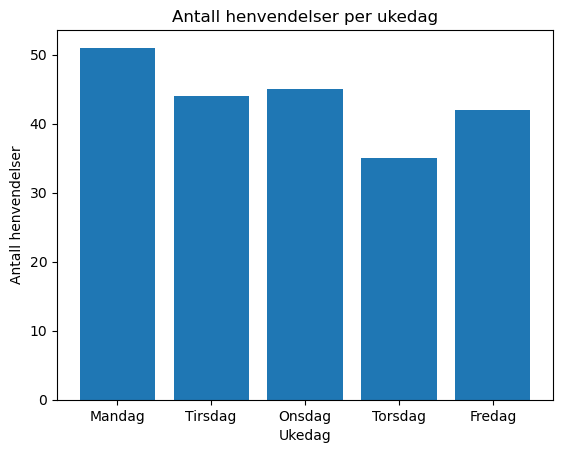

In [2]:
import matplotlib.pyplot as plt

# Tell forekomster
ukedager = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']
dag_teller = {dag: 0 for dag in ukedager}

for dag in u_dag:
    if dag in dag_teller:
        dag_teller[dag] += 1

# Plot
plt.bar(dag_teller.keys(), dag_teller.values())
plt.title("Antall henvendelser per ukedag")
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.show()



In [ ]:
# Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
# Svaret skrives til skjerm med informativ tekst.

In [3]:
min_tid = min(varighet)
max_tid = max(varighet)

print(f"Minste samtaletid: {min_tid} minutter")
print(f"Lengste samtaletid: {max_tid} minutter")


Minste samtaletid: 00:00:59 minutter
Lengste samtaletid: 00:11:28 minutter


In [ ]:
# Del d) Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
# henvendelser i uke 24.

In [4]:
import pandas as pd
import numpy as np
from datetime import timedelta

# Vi har allerede lastet inn dokumentet:
df = pd.read_excel('support_uke_24.xlsx')

# Vi henter kolonnen "Varighet" fra kolonne C i filen:
rå_varighet = df.iloc[:, 2]  # kolonne C = indeks 2

# Lager en liste med minutter for at det skal se bedre ut.
varighet_i_minutter = []

# Benytter for, try/except og if/else funksjonalitet.

for verdi in rå_varighet:
    try:
        if isinstance(verdi, str):
            # Konverterer fra tekst til timedelta
            t = pd.to_timedelta(verdi)
        else:
            t = verdi  # allerede timedelta

        minutter = t.total_seconds() / 60
        varighet_i_minutter.append(minutter)
    except Exception as e:
        # Hopper over de evt som er ugyldige rader for at programmet skal kunne fungere med dette datasettet også.
        print(f"Hopper over ugyldig verdi: {verdi}")
        continue

# Nå endrer vi koden slik at den kan benyttes også på tomme verdier med if/else funksjonalitet - ved f.eks oppstart av ny logg.
if varighet_i_minutter:
    gjennomsnitt = np.mean(varighet_i_minutter)
    print(f"Gjennomsnittlig samtaletid: {gjennomsnitt:.2f} minutter")
else:
    print("Fant ingen gyldige samtaletider.")




Gjennomsnittlig samtaletid: 6.67 minutter


In [ ]:
# Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
# 14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
# for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
# bruk av et sektordiagram (kakediagram).

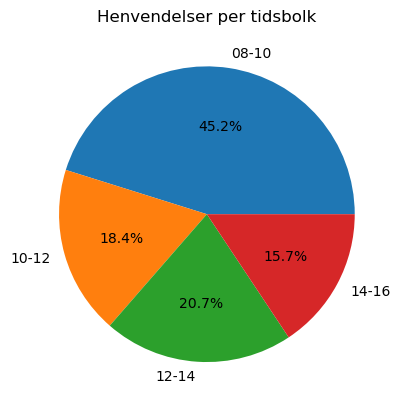

In [5]:
from datetime import time

# Lag tellere / bolker
tidsbolker = {
    '08-10': 0,
    '10-12': 0,
    '12-14': 0,
    '14-16': 0
}

# Gå gjennom alle klokkeslett med for og if/else/elif funksjonalitet

for tidspunkt in kl_slett:
    if isinstance(tidspunkt, str):  # Hvis klokkeslett er tekst, f.eks. '08:30'
        timer = int(tidspunkt.split(':')[0])
    else:  # Hvis det er datetime.time-objekt
        timer = tidspunkt.hour
# Legger til 1 ekstra pr telling
    
    if 8 <= timer < 10:
        tidsbolker['08-10'] += 1
    elif 10 <= timer < 12:
        tidsbolker['10-12'] += 1
    elif 12 <= timer < 14:
        tidsbolker['12-14'] += 1
    elif 14 <= timer < 16:
        tidsbolker['14-16'] += 1

# Plot kakediagram
plt.pie(tidsbolker.values(), labels=tidsbolker.keys(), autopct='%1.1f%%')
plt.title("Henvendelser per tidsbolk")
plt.show()


In [ ]:
# Del f) Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og
# 10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net
# Promoter Score).

Net Promoter Score for supportavdelingen er: 41.9


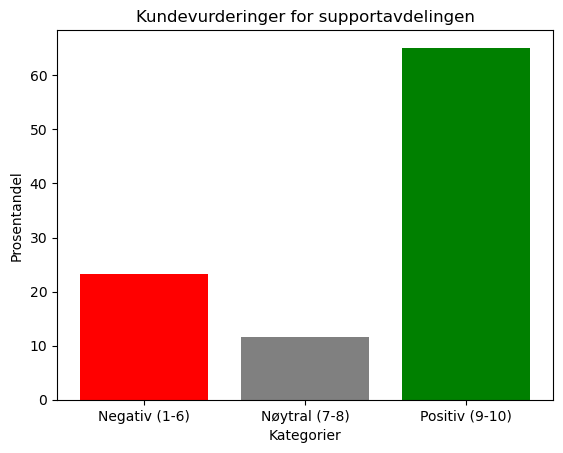

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Fjern tomme vurderinger
gyldige_scores = [s for s in score if pd.notna(s)]

# Klassifiser vurderingene i kategorier
negativ = len([s for s in gyldige_scores if s <= 6])
noytral = len([s for s in gyldige_scores if 7 <= s <= 8])
positiv = len([s for s in gyldige_scores if s >= 9])

# Total antall vurderinger
antall = len(gyldige_scores)

# Beregn prosentandel for hver kategori
prosent_negativ = (negativ / antall) * 100
prosent_noytral = (noytral / antall) * 100
prosent_positiv = (positiv / antall) * 100

# Beregn Net Promoter Score
nps = prosent_positiv - prosent_negativ

# Printer resultatet
print(f"Net Promoter Score for supportavdelingen er: {nps:.1f}")

# Visualiserer resultatet i 3 kategorier
kategorier = ['Negativ (1-6)', 'Nøytral (7-8)', 'Positiv (9-10)']
prosentverdier = [prosent_negativ, prosent_noytral, prosent_positiv]

plt.bar(kategorier, prosentverdier, color=['red', 'grey', 'green'])
plt.xlabel('Kategorier')
plt.ylabel('Prosentandel')
plt.title('Kundevurderinger for supportavdelingen')
plt.show()


In [ ]:
# Takk for meg. Mvh Rune Restad